In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


     age  sex  cp  trestbps  chol   ...    oldpeak  slope  ca  thal  target
0     63    1   3       145   233   ...        2.3      0   0     1       1
1     37    1   2       130   250   ...        3.5      0   0     2       1
2     41    0   1       130   204   ...        1.4      2   0     2       1
3     56    1   1       120   236   ...        0.8      2   0     2       1
4     57    0   0       120   354   ...        0.6      2   0     2       1
5     57    1   0       140   192   ...        0.4      1   0     1       1
6     56    0   1       140   294   ...        1.3      1   0     2       1
7     44    1   1       120   263   ...        0.0      2   0     3       1
8     52    1   2       172   199   ...        0.5      2   0     3       1
9     57    1   2       150   168   ...        1.6      2   0     2       1
10    54    1   0       140   239   ...        1.2      2   0     2       1
11    48    0   2       130   275   ...        0.2      2   0     2       1
12    49    

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


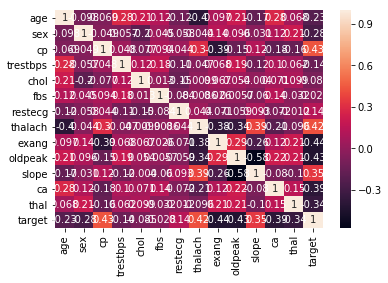

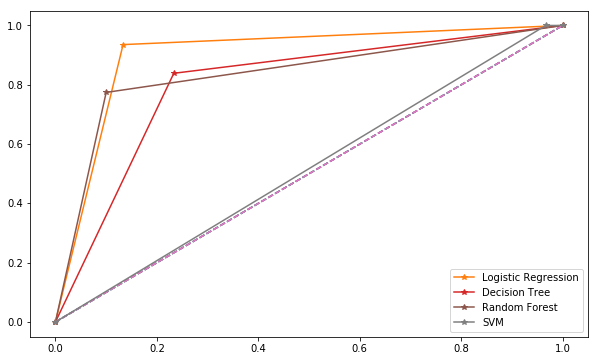

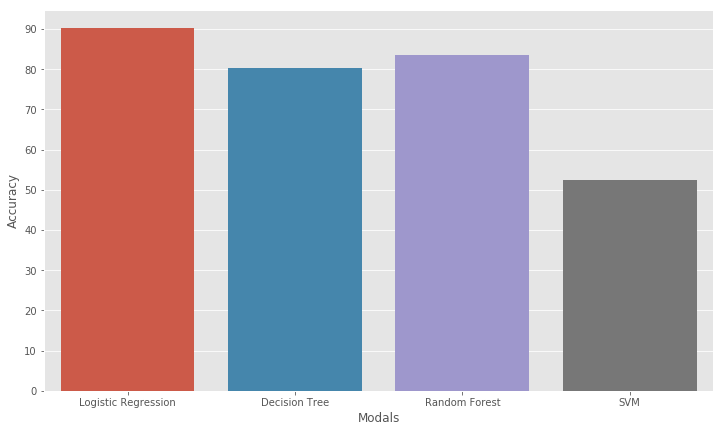

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#read the file
file=pd.read_csv('../input/heart.csv')
print(file)

print(type(file))

#add a correlation matrix to analyze if there are similar attributes.
correlation_table=file.corr()
corr=sns.heatmap(correlation_table,annot=True)


#assign training and testing dataset
x=file.drop(['target'],axis=1)
#print(x)
y=file.target
#print(y)


#train the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,auc




algorithm={'Logistic Regression': LogisticRegression(solver='lbfgs'),
           'Decision Tree':DecisionTreeClassifier(),
           'Random Forest':RandomForestClassifier(),
           'SVM':SVC(gamma='auto_deprecated',C=1.0,kernel='rbf'),
           }

predict_value = {}
plt.figure(figsize=(10, 6))
#verify which algorithm gives best accuracy
for k, v in algorithm.items():
    model = v
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    predict_value[k] = model.score(x_test, y_test) * 100
    print('Accuracy of ' + k + ' is {0:.2f}'.format(model.score(x_test, y_test) * 100))
    print('AUC-ROC Curve of ' + k + ' is {0:.2f}\n'.format(roc_auc * 100))

    # plot the roc curve for the model
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(false_positive_rate, true_positive_rate, marker='*', label=k)
    plt.legend(loc='lower right')

plt.show()

plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.barplot(x=list(predict_value.keys()), y=list(predict_value.values()))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy")
plt.xlabel("Modals")
plt.show()